<a href="https://colab.research.google.com/github/muralikrishnan2022/Dementia_ANN/blob/main/ANN_Dementia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dementia dataset classification using ANN considering every pixel as a feature

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import metrics
import cv2 as cv
from sklearn.model_selection import train_test_split
import os, sys


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1='/content/drive/MyDrive/Alzheimer Dataset/NonDemented'
path2='/content/drive/MyDrive/Alzheimer Dataset/ModerateDemented'
files1=os.listdir(path1)
files2=os.listdir(path2)
Num_files_N=len(files1)
Num_files_D=len(files2)
dataset_len=Num_files_N+Num_files_D

In [ ]:
Num_files_N

100

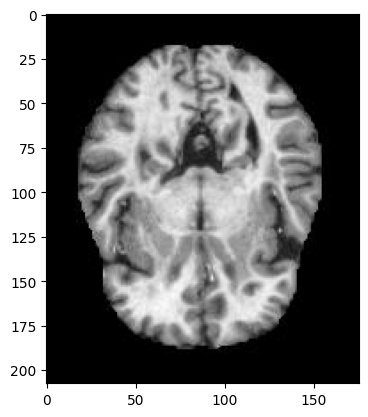

In [ ]:
name=path1+'/'+files1[0]
img=cv.imread(name)
plt.imshow(img)

In [ ]:
img.shape

(208, 176, 3)

In [ ]:
img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
img_gs.shape

(208, 176)

In [ ]:
img_gs=cv.resize(img_gs,(100,100))

In [ ]:
img_gs.shape

(100, 100)

In [ ]:
data=np.zeros((dataset_len,100,100))
data.shape
label=[]

In [ ]:
data.shape

(152, 100, 100)

In [ ]:
for i in range(Num_files_N):
    name=path1+'/'+files1[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    data[i,:,:]=img_gs
    label.append('Normal')

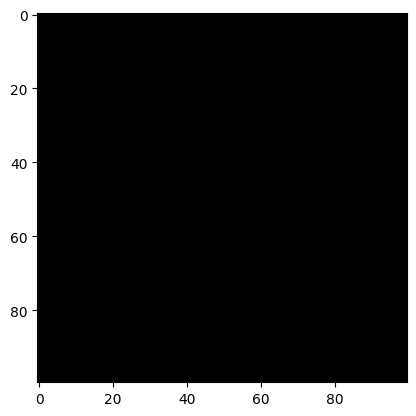

In [ ]:
plt.imshow(data[100,:,:],cmap='gray')

In [ ]:
for i in range(Num_files_D):
    name=path2+'/'+files2[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    data[i+Num_files_N,:,:]=img_gs
    label.append('Dementia')

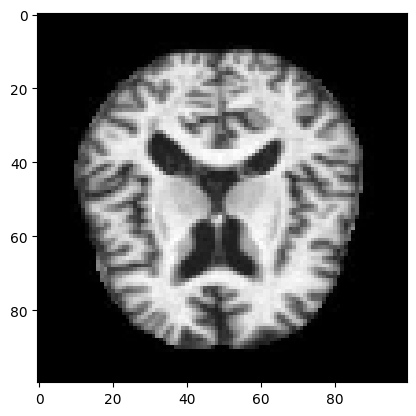

In [ ]:
plt.imshow(data[100,:,:],cmap='gray')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab=le.fit_transform(label)

In [ ]:
lab

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
type(data)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,lab,test_size=0.3,random_state=1)

In [ ]:
type(x_train)

Build the network

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(100,100)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(2,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_15 (Dense)            (None, 64)                640064    
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642210 (2.45 MB)
Trainable params: 642210 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [ ]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 1s 9ms/step - loss: 0.5850 - accuracy: 0.6509
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7636 - accuracy: 0.5660
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 0.5556 - accuracy: 0.7075
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5577 - accuracy: 0.7170
Epoch 5/50
4/4 [==============================] - 0s 9ms/step - loss: 0.5890 - accuracy: 0.6415
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.4156 - accuracy: 0.8679
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3595 - accuracy: 0.9151
Epoch 8/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2629 - accuracy: 0.9151
Epoch 9/50
4/4 [==============================] - 0s 8ms/step - loss: 0.4835 - accuracy: 0.7358
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2481 - accuracy: 0.9245
Epoch 11/50
4/4 [==============================] -

In [ ]:
y_predict=model.predict(x_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
y_predict.shape

(46, 2)

In [ ]:
y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))

In [ ]:
y_pred

In [ ]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[15  0]
 [ 0 31]]


In [ ]:
print('Classifier Accuracy:')
print(metrics.accuracy_score(y_test,y_pred))

Classifier Accuracy:
1.0


Text(0, 0.5, 'True Positive Rate')

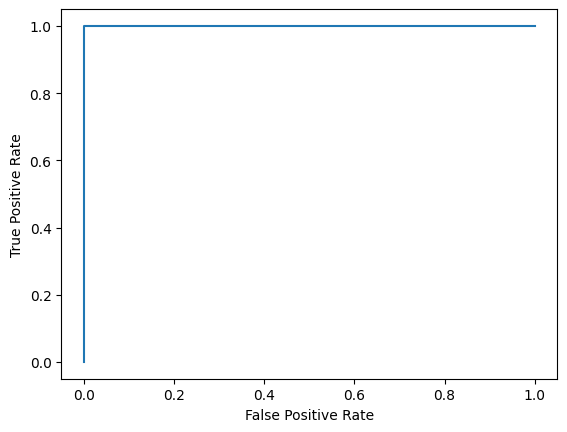

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
x_test.shape

(46, 100, 100)

In [ ]:
test=np.zeros((1,100,100))


In [ ]:
img=cv.imread('mildDem75.jpg')
img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
img_gs=cv.resize(img_gs,(100,100))
img_gs=img_gs/255
test[0,:,:]=img_gs

In [ ]:
np.argmax(model.predict(test))

1/1 [==============================] - 0s 45ms/step


1